# Red Wine Analysis

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data
red = pd.read_csv("winequality-red.csv", delimiter=";")

In [3]:
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Data Visualization

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


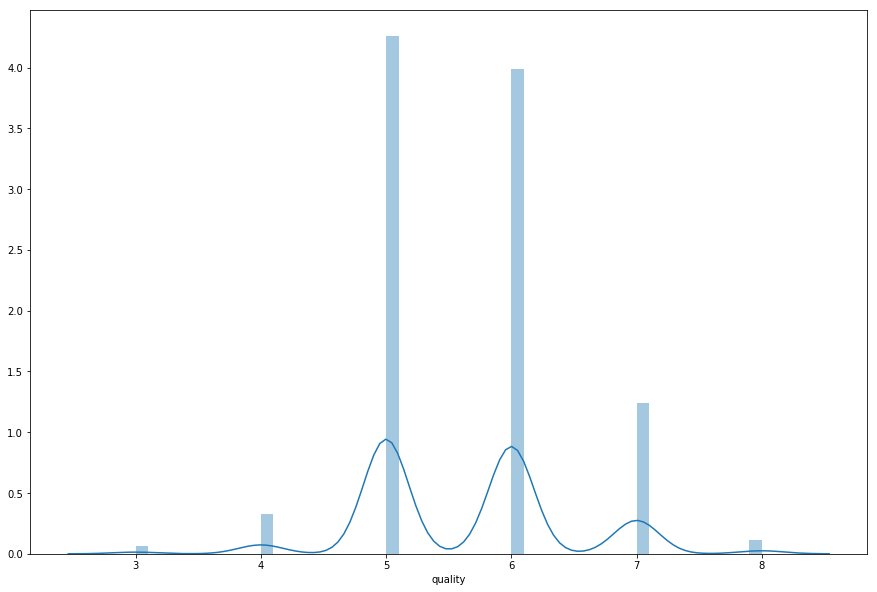

In [5]:
# distribution of quality
plt.figure(figsize=(15,10))
sns.distplot(red['quality'], bins=50)
plt.show()

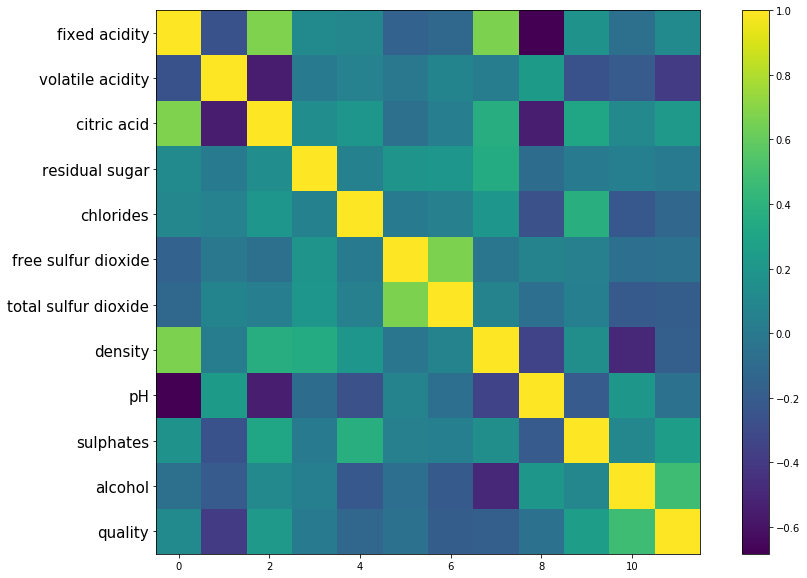

In [6]:
plt.figure(figsize=(15,10))
plt.imshow(red.corr(), origin='upper')
plt.yticks(range(len(red.columns)), red.columns, size=15)
plt.colorbar()
plt.show()

In [7]:
red.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

## feature selection
'alcohol' and 'volatile acidity' are most correlated with quality, where alcohol has a correlation score of 0.476 and volatile acidity has a correlation score of -0.39 with quality.

Text(0.5, 1.0, 'Volatile acidity vs. Quality')

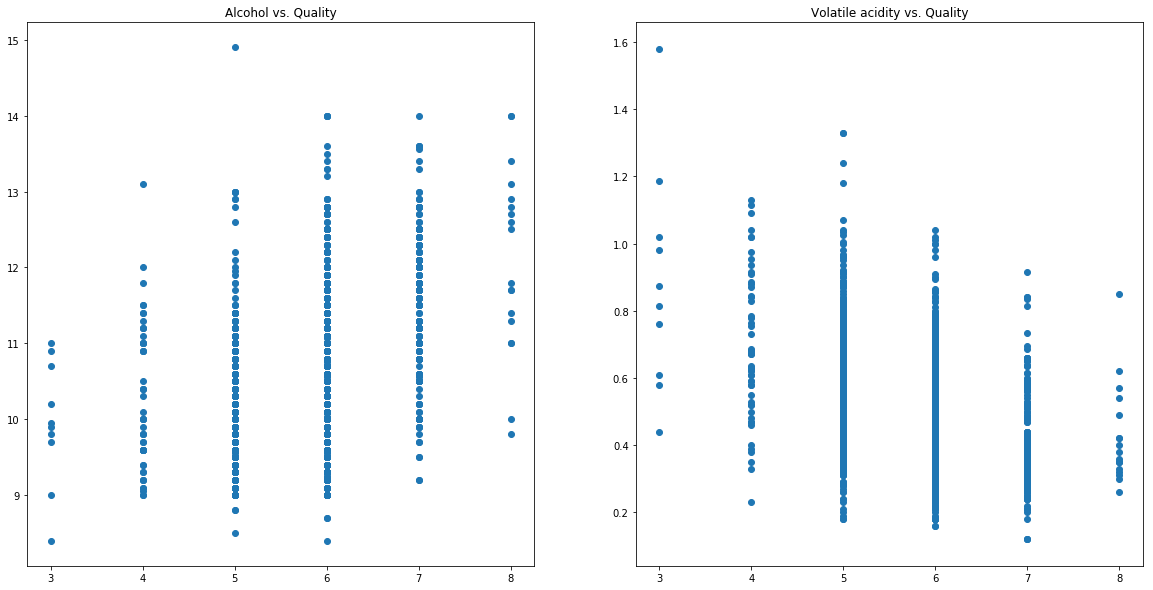

In [8]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

ax[0].scatter(y=red['alcohol'],x=red['quality'])
ax[0].set_title("Alcohol vs. Quality")
ax[1].scatter(y=red['volatile acidity'],x=red.quality)
ax[1].set_title("Volatile acidity vs. Quality")

# Data Cleaning

In [9]:
# normalize the scale of quality, alcohol and volatile acidity
normalized_red=(red-red.min())/(red.max()-red.min())
normalized_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


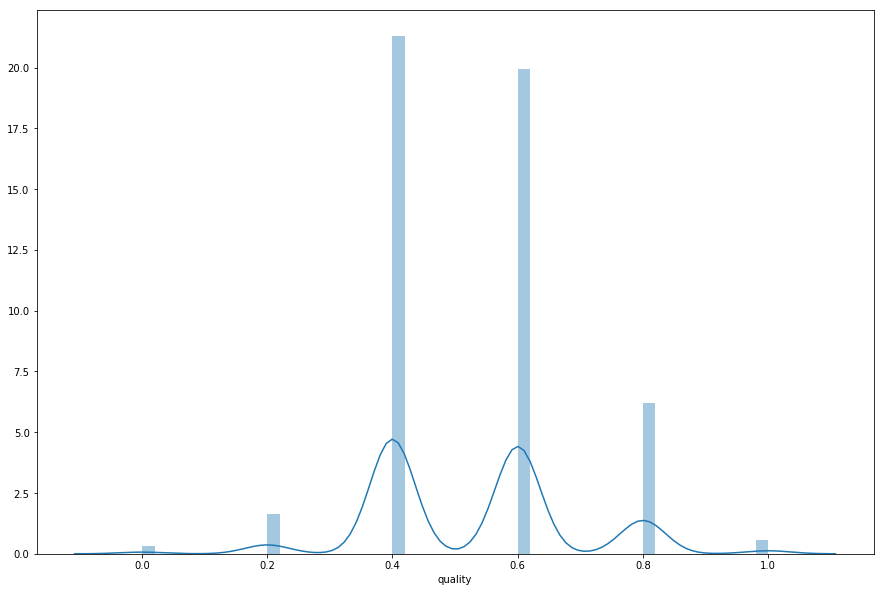

In [10]:
plt.figure(figsize=(15,10))
sns.distplot(normalized_red['quality'], bins=50)
plt.show()

In [11]:
normalized_red['quality'] = normalized_red['quality'].astype('category')

In [12]:
normalized_red.quality.value_counts()

0.4    681
0.6    638
0.8    199
0.2     53
1.0     18
0.0     10
Name: quality, dtype: int64

In [13]:
normalized_red.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
dtype: object

## Clustering

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=21).fit(normalized_red)
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 0])

In [15]:
cluster_count = {}
for c in kmeans.labels_:
    cluster_count[c] = cluster_count.get(c,0)+1
cluster_count

{1: 970, 0: 629}

Text(0.5, 1.0, 'sulphates vs. Quality')

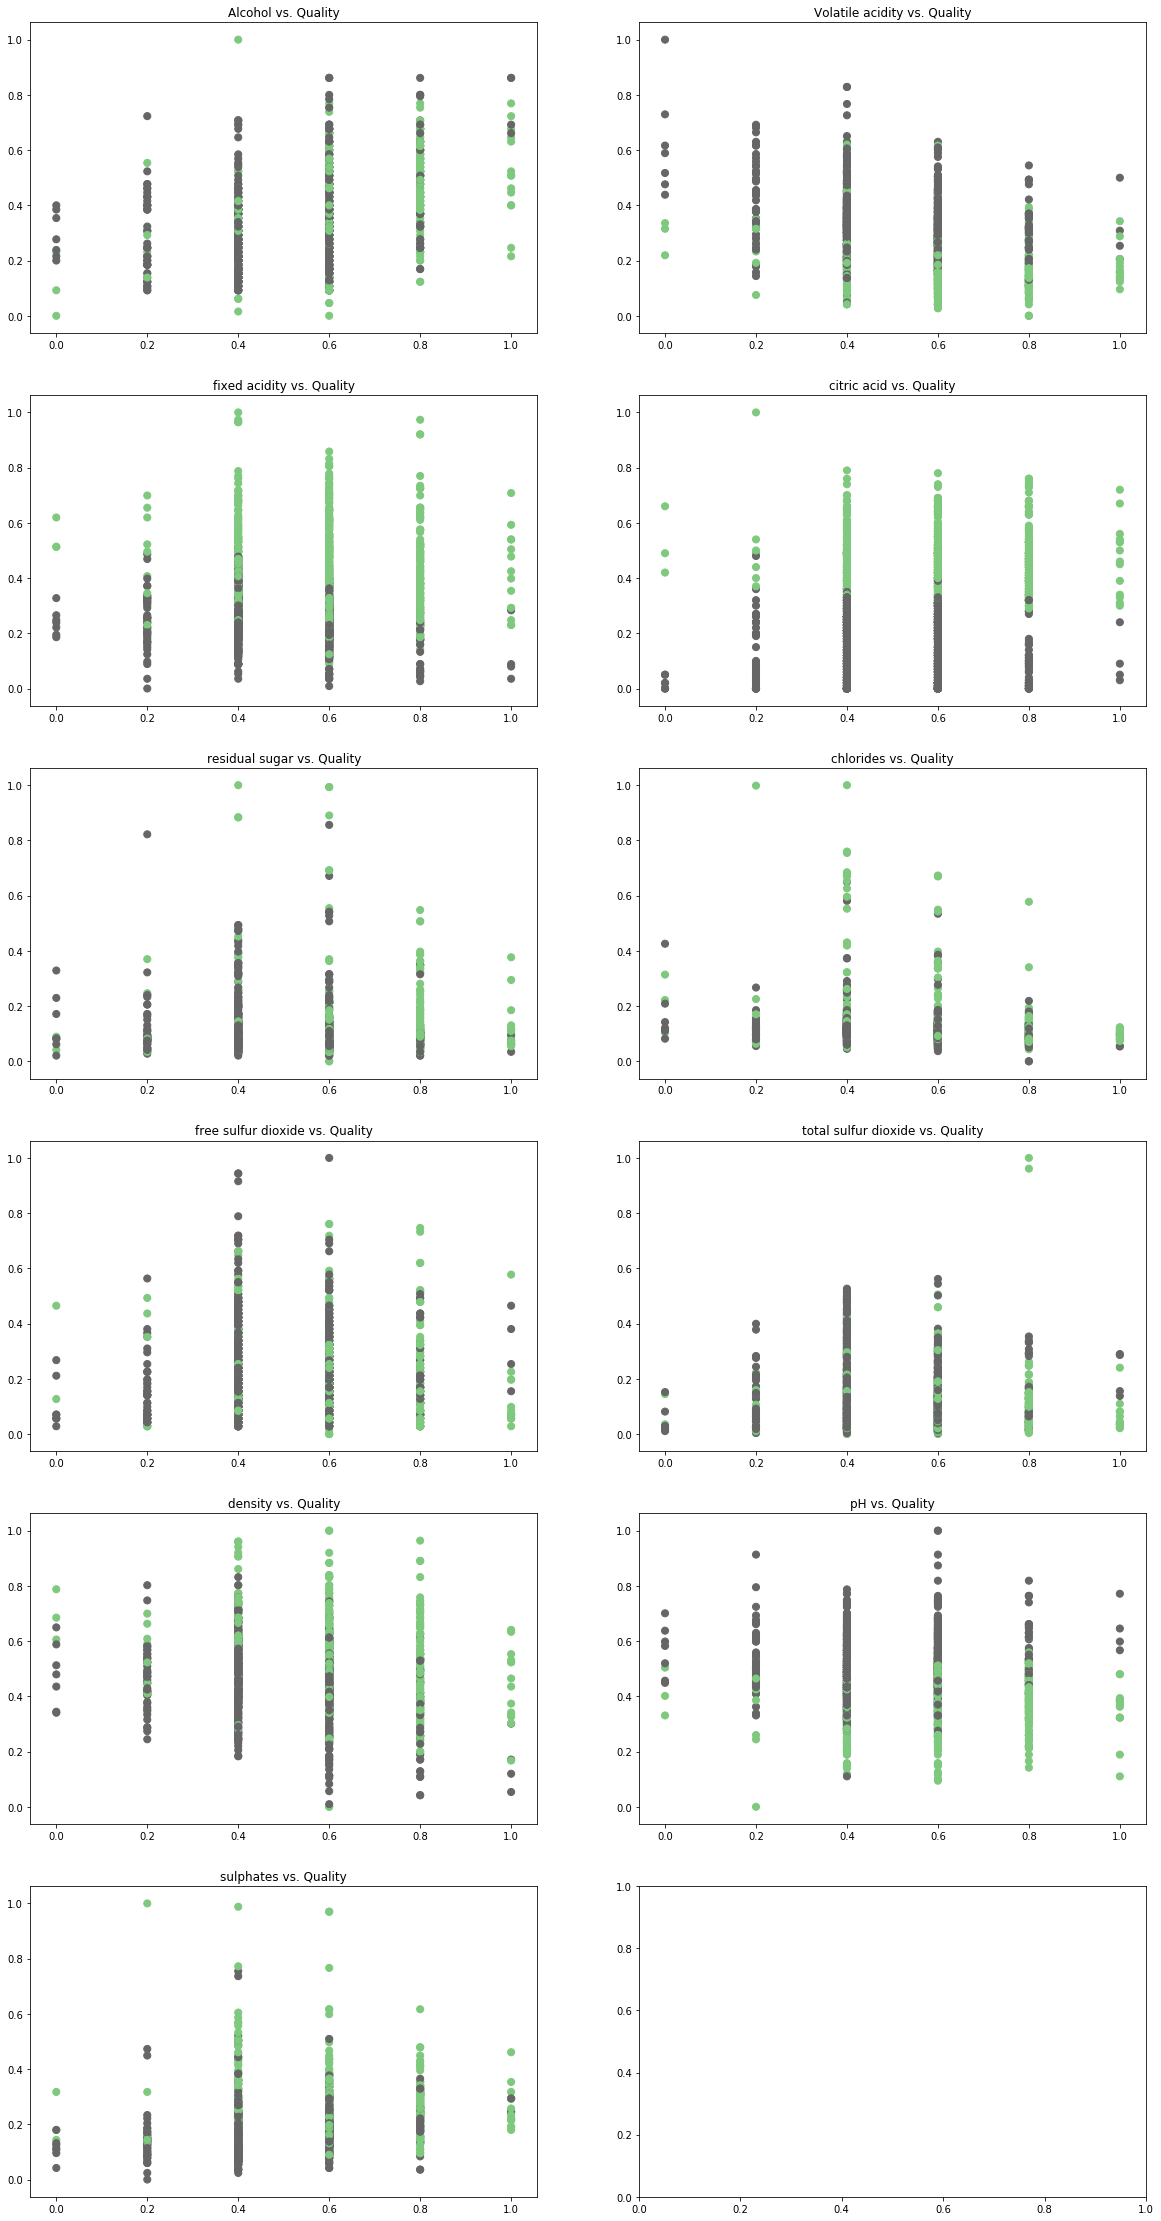

In [16]:
fig, ax = plt.subplots(6,2, figsize=(20,40))

ax[0,0].scatter(y=normalized_red['alcohol'],x=normalized_red['quality'],c=kmeans.labels_,s=50,cmap='Accent')
ax[0,0].set_title("Alcohol vs. Quality")
ax[0,1].scatter(y=normalized_red['volatile acidity'],x=normalized_red['quality'],c=kmeans.labels_,s=50,cmap='Accent')
ax[0,1].set_title("Volatile acidity vs. Quality")
ax[1,0].scatter(y=normalized_red['fixed acidity'],x=normalized_red['quality'],c=kmeans.labels_,s=50,cmap='Accent')
ax[1,0].set_title("fixed acidity vs. Quality")
ax[1,1].scatter(y=normalized_red['citric acid'],x=normalized_red['quality'],c=kmeans.labels_,s=50,cmap='Accent')
ax[1,1].set_title("citric acid vs. Quality")
ax[2,0].scatter(y=normalized_red['residual sugar'],x=normalized_red['quality'],c=kmeans.labels_,s=50,cmap='Accent')
ax[2,0].set_title("residual sugar vs. Quality")
ax[2,1].scatter(y=normalized_red['chlorides'],x=normalized_red['quality'],c=kmeans.labels_,s=50,cmap='Accent')
ax[2,1].set_title("chlorides vs. Quality")
ax[3,0].scatter(y=normalized_red['free sulfur dioxide'],x=normalized_red['quality'],c=kmeans.labels_,s=50,cmap='Accent')
ax[3,0].set_title("free sulfur dioxide vs. Quality")
ax[3,1].scatter(y=normalized_red['total sulfur dioxide'],x=normalized_red['quality'],c=kmeans.labels_,s=50,cmap='Accent')
ax[3,1].set_title("total sulfur dioxide vs. Quality")
ax[4,0].scatter(y=normalized_red['density'],x=normalized_red['quality'],c=kmeans.labels_,s=50,cmap='Accent')
ax[4,0].set_title("density vs. Quality")
ax[4,1].scatter(y=normalized_red['pH'],x=normalized_red['quality'],c=kmeans.labels_,s=50,cmap='Accent')
ax[4,1].set_title("pH vs. Quality")
ax[5,0].scatter(y=normalized_red['sulphates'],x=normalized_red['quality'],c=kmeans.labels_,s=50,cmap='Accent')
ax[5,0].set_title("sulphates vs. Quality")

In [17]:
normalized_red['class']=kmeans.labels_
normalized_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,1


# Train and test dataset
The original dataset is seperated into the train and test dataset. The train set will then be seperated into smaller train and test set which are used for training the model. The best model will be used to predict the test dataset. The purpose of this is to ensure that the model actually works. 

In [18]:
import numpy as np
from statistics import mean
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

In [19]:
# train and test set
red_train, red_test = train_test_split(normalized_red, test_size=0.3)

# spliting the X and y of training set
red_train_X = red_train.drop('class', axis=1)
red_train_y = red_train['class']

# split the X and y of testing set
red_test_X = red_test.drop('class', axis=1)
red_test_y = red_test['class']

# Oversampling - Synthetic Minority Over-sampling Technique (SMOTE)
The SMOTE method generates synthetic data points of the minority class which have close approximity as the actual data points. I would then use the oversampled data for training the models. 

In [20]:
# SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
print('Original dataset shape %s' % Counter(red_train_y)) # distribution of classes before SMOTE
sm = SMOTE(random_state=37)
red_train_X_res, red_train_y_res = sm.fit_resample(red_train_X, red_train_y)
print('Resampled dataset shape %s' % Counter(red_train_y_res)) # distribution of classes after SMOTE

# change the datasets into dataframes. 
red_train_X_res = pd.DataFrame(red_train_X_res)
red_train_y_res = pd.DataFrame(red_train_y_res)
red_train_res = pd.concat([red_train_X_res, red_train_y_res], axis=1, sort=False)

Using TensorFlow backend.


Original dataset shape Counter({1: 678, 0: 441})
Resampled dataset shape Counter({1: 678, 0: 678})


# Training and testing the model
I am using KFold to train the model. The testing of the model is done on unseen data.

In [21]:
# get classification report
def get_report(y_true, y_pred):
    return classification_report(y_true, y_pred)

# train and test the model using KFold
def test(model, df, X, y, num_splits = 5):
    # model: model for training
    # df: training dataset
    # X: exploratory features
    # y: explanatory features (target)
    # num_splits: number of splits for the KFold. Default is 3. 
    
    scores_of_model = [] # contains the score of each fold
    kf = KFold(n_splits=num_splits) # KFold
    
    for train_index, test_index in kf.split(df.index):
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, np.ravel(y_train)) # train the model
        score = model.score(X_test, np.ravel(y_test))
        scores_of_model.append(score) # score of testing
        #print("Score of the model", score) # get score of the model
        
        ypred = model.predict(X_test) # prediction
        #print(get_report(y_test, ypred)) # get classification report
        
        # find locations of the wrong predictions to find similarities of these data
        #ag = ~(ypred==y_test) # location of the wrong predictions
        #wrong_ag.extend(test_index[ag]) # record of wrong predictions
        
    print("Mean score of the model ", mean(scores_of_model)) # mean score of the model

def run(model):
    red_pred = test(model, red_train_res, red_train_X_res, red_train_y_res)
    # test the model using unseen data
    ypred = model.predict(red_test_X) # prediction
    print(get_report(red_test_y, ypred)) # get classification report
    print("Score of the model for testing:", model.score(red_test_X, red_test_y))

In [22]:
# test the models 
rf = RandomForestClassifier(n_estimators=50)
gbc = GradientBoostingClassifier(random_state = 21)
knn = KNeighborsClassifier(n_neighbors=15)
for model, model_name in zip([rf, gbc, knn], ['Random Forest','Gradient Boosting','K-Nearest Neighbors']):
    print(model_name)
    run(model)
    print()

Random Forest
Mean score of the model  0.9808389407423486
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       188
           1       0.98      0.98      0.98       292

   micro avg       0.97      0.97      0.97       480
   macro avg       0.97      0.97      0.97       480
weighted avg       0.97      0.97      0.97       480

Score of the model for testing: 0.975

Gradient Boosting
Mean score of the model  0.9793602127197742
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       188
           1       0.98      0.99      0.99       292

   micro avg       0.99      0.99      0.99       480
   macro avg       0.99      0.98      0.98       480
weighted avg       0.99      0.99      0.99       480

Score of the model for testing: 0.9854166666666667

K-Nearest Neighbors
Mean score of the model  0.9601828738875624
              precision    recall  f1-score   support

           0    